<a href="https://colab.research.google.com/github/Devanshu703/Coursera_Capstone/blob/main/covid_county_wise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SOLUTION CODE**



---



**Importing Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline


# **Data Sample Cleaning and Analysis**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DATA/EQ_2021_Data_Sample.csv', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (31,32,33,34) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179375 entries, 0 to 1179374
Data columns (total 82 columns):
 #   Column                                                                  Non-Null Count    Dtype  
---  ------                                                                  --------------    -----  
 0   countyFIPS                                                              1179375 non-null  int64  
 1   stateFIPS                                                               1179375 non-null  int64  
 2   date                                                                    1179375 non-null  object 
 3   confirmed_cases                                                         1179375 non-null  int64  
 4   deaths                                                                  1179375 non-null  int64  
 5   google_mobility_retail_and_recreation                                   566919 non-null   float64
 6   google_mobility_grocery_and_pharmacy                      

In [5]:
df.shape

(1179375, 82)

In [6]:
pd.set_option('display.max.columns',None)
pd.set_option('display.precision',2)

In [7]:
df.head()

,countyFIPS,stateFIPS,date,confirmed_cases,deaths,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_parks,google_mobility_transit_stations,google_mobility_workplaces,google_mobility_residential,apple_mobility_driving,apple_mobility_transit,apple_mobility_walking,Electricity_Sales_ Revenue_Residential ($ x1000),Electricity_Sales_ Sales_Residential (MWHr),Electricity_Sales_ Customers_Count_Residential,Electricity_Sales_ Revenue_Commercial ($ x1000),Electricity_Sales_ Sales_Commercial (MWHr),Electricity_Sales_ Customers_Count_Commercial,Electricity_Sales_ Revenue_Industrial ($ x1000),Electricity_Sales_ Sales_Industrial (MWHr),Electricity_Sales_ Customers_Count_Industrial,Electricity_Sales_ Revenue_Transportation ($ x1000),Electricity_Sales_ Sales_Transportation (MWHr),Electricity_Sales_ Customers_Count_Transportation,DOMESTIC_Air_Passengers,INTERNATIONAL_Air_Passengers,DOMESTIC_Flights_Cnt,INTERNATIONAL_Flights_Cnt,YoY_Reopened_Seated_Diner_Data,test_count,test_rate,new_test_rate,new_test_count,C_PCTPOVALL_2019,C_PCTPOV017_2019,C_PCTPOV517_2019,C_MEDHHINC_2019,C_TOT_POP,C_TOT_MALE,C_TOT_FEMALE,C_WA_MALE,C_WA_FEMALE,C_MinorityPCT,C_BlackPCT,C_HispanicPCT,C_M_Labour_Force_corr,C_M_Employed_corr,C_M_Unemployment_Rate_corr,S_D_dly_new_test,S_D_cummulative_test,initclaims_count_regular_cw,initclaims_rate_regular_cw,spend_all_cd,merchants_all_cd,revenue_all_cd,critical_staffing_shortage_today_yes_SD,critical_staffing_shortage_anticipated_within_week_yes_SD,hospital_onset_covid_SD,hospital_onset_covid_coverage_SD,inpatient_beds_SD,inpatient_beds_coverage_SD,previous_day_admission_adult_covid_confirmed_SD,previous_day_admission_adult_covid_suspected_SD,previous_day_admission_pediatric_covid_confirmed_SD,previous_day_admission_pediatric_covid_suspected_SD,staffed_adult_icu_bed_occupancy_SD,staffed_adult_icu_bed_occupancy_coverage_SD,staffed_icu_adult_patients_confirmed_and_suspected_covid_SD,staffed_icu_adult_patients_confirmed_covid_SD,total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD,total_adult_patients_hospitalized_confirmed_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD
0,1001,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,101.51,NaN,NaN,670692.3,5.41e+06,4.59e+06,398194.88,3.44e+06,744182.0,309206.55,5.51e+06,16298.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,.,.,.,.,12.1,15.9,14.4,58233.0,55514.0,27053.0,28461.0,21383.0,22185.0,0.24,0.18,0.03,26127.0,25513.0,2.4,NaN,NaN,NaN,NaN,116.0,NaN,NaN,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1003,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,103.12,NaN,94.32,670692.3,5.41e+06,4.59e+06,398194.88,3.44e+06,744182.0,309206.55,5.51e+06,16298.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,.,.,.,.,10.1,13.5,13.3,59871.0,190790.0,93035.0,97755.0,81423.0,85193.0,0.17,0.10,0.05,95993.0,93689.0,2.4,NaN,NaN,NaN,NaN,269.0,-17.0,-495.0,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1005,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,120.67,NaN,NaN,670692.3,5.41e+06,4.59e+06,398194.88,3.44e+06,744182.0,309206.55,5.51e+06,16298.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,.,.,.,.,27.1,41.0,39.5,35972.0,27201.0,14602.0,12599.0,7397.0,6338.0,0.54,0.47,0.05,8624.0,8349.0,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1007,1,2020-01-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN,111.18,NaN,NaN,670692.3,5.41e+06,4.59e+06,398194.88,3.44e+06,744182.0,309206.55,5.51e+06,16298.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,.,.,.,.,20.3,25.9,25.2,47918.0,22597.0,12195.0,10402.0,8903.0,8326.0,0.25,0.22,0.02,875

In [8]:
df.replace('.', '0', inplace=True)

**Changing Datatypes accordingly**

In [9]:
df.iloc[:,31:35] = df.iloc[:,31:35].astype('float64')

In [10]:
df['date'] = pd.to_datetime(df['date'])


In [11]:
df.iloc[:,4] = df.iloc[:,4].astype('float64')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179375 entries, 0 to 1179374
Data columns (total 82 columns):
 #   Column                                                                  Non-Null Count    Dtype         
---  ------                                                                  --------------    -----         
 0   countyFIPS                                                              1179375 non-null  int64         
 1   stateFIPS                                                               1179375 non-null  int64         
 2   date                                                                    1179375 non-null  datetime64[ns]
 3   confirmed_cases                                                         1179375 non-null  int64         
 4   deaths                                                                  1179375 non-null  float64       
 5   google_mobility_retail_and_recreation                                   566919 non-null   float64       
 6   go

**Assumption: New Confirmed Cases started rising from 2020-03-01**



In [13]:
df = df[(df['date'].dt.year == 2021) | (df['date'] >= '2020-03')]

In [14]:
df.shape

(1056720, 82)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056720 entries, 122655 to 1179374
Data columns (total 82 columns):
 #   Column                                                                  Non-Null Count    Dtype         
---  ------                                                                  --------------    -----         
 0   countyFIPS                                                              1056720 non-null  int64         
 1   stateFIPS                                                               1056720 non-null  int64         
 2   date                                                                    1056720 non-null  datetime64[ns]
 3   confirmed_cases                                                         1056720 non-null  int64         
 4   deaths                                                                  1056720 non-null  float64       
 5   google_mobility_retail_and_recreation                                   531092 non-null   float64       
 6

In [16]:
df.corr()

,countyFIPS,stateFIPS,confirmed_cases,deaths,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_parks,google_mobility_transit_stations,google_mobility_workplaces,google_mobility_residential,apple_mobility_driving,apple_mobility_transit,apple_mobility_walking,Electricity_Sales_ Revenue_Residential ($ x1000),Electricity_Sales_ Sales_Residential (MWHr),Electricity_Sales_ Customers_Count_Residential,Electricity_Sales_ Revenue_Commercial ($ x1000),Electricity_Sales_ Sales_Commercial (MWHr),Electricity_Sales_ Customers_Count_Commercial,Electricity_Sales_ Revenue_Industrial ($ x1000),Electricity_Sales_ Sales_Industrial (MWHr),Electricity_Sales_ Customers_Count_Industrial,Electricity_Sales_ Revenue_Transportation ($ x1000),Electricity_Sales_ Sales_Transportation (MWHr),Electricity_Sales_ Customers_Count_Transportation,DOMESTIC_Air_Passengers,INTERNATIONAL_Air_Passengers,DOMESTIC_Flights_Cnt,INTERNATIONAL_Flights_Cnt,YoY_Reopened_Seated_Diner_Data,test_count,test_rate,new_test_rate,new_test_count,C_PCTPOVALL_2019,C_PCTPOV017_2019,C_PCTPOV517_2019,C_MEDHHINC_2019,C_TOT_POP,C_TOT_MALE,C_TOT_FEMALE,C_WA_MALE,C_WA_FEMALE,C_MinorityPCT,C_BlackPCT,C_HispanicPCT,C_M_Labour_Force_corr,C_M_Employed_corr,C_M_Unemployment_Rate_corr,S_D_dly_new_test,S_D_cummulative_test,initclaims_count_regular_cw,initclaims_rate_regular_cw,spend_all_cd,merchants_all_cd,revenue_all_cd,critical_staffing_shortage_today_yes_SD,critical_staffing_shortage_anticipated_within_week_yes_SD,hospital_onset_covid_SD,hospital_onset_covid_coverage_SD,inpatient_beds_SD,inpatient_beds_coverage_SD,previous_day_admission_adult_covid_confirmed_SD,previous_day_admission_adult_covid_suspected_SD,previous_day_admission_pediatric_covid_confirmed_SD,previous_day_admission_pediatric_covid_suspected_SD,staffed_adult_icu_bed_occupancy_SD,staffed_adult_icu_bed_occupancy_coverage_SD,staffed_icu_adult_patients_confirmed_and_suspected_covid_SD,staffed_icu_adult_patients_confirmed_covid_SD,total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD,total_adult_patients_hospitalized_confirmed_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD
countyFIPS,1.00,1.00,-0.04,-0.03,3.95e-02,0.03,0.13,7.08e-02,-9.17e-03,1.72e-03,2.62e-02,6.60e-02,0.05,0.12,0.17,0.11,0.06,0.23,0.12,0.11,2.47e-01,2.52e-01,2.61e-02,2.11e-02,-0.02,7.80e-18,-1.65e-16,-1.84e-16,1.08e-16,0.04,-5.26e-03,-9.65e-03,-0.01,-0.02,-0.08,-0.07,-0.08,0.05,-5.49e-02,-5.52e-02,-5.45e-02,-5.11e-02,-5.02e-02,-0.05,-1.28e-01,0.09,-5.15e-02,-5.13e-02,0.01,-0.17,-0.07,-0.07,3.98e-02,7.63e-03,3.02e-02,1.52e-02,1.35e-01,1.39e-01,3.52e-02,0.16,0.10,0.16,0.05,4.93e-03,0.05,0.04,0.08,0.13,0.08,0.08,0.06,0.06,-0.02,0.08,8.60e-03,0.10,0.09,-0.09,-0.08,-4.03e-02,-0.01
stateFIPS,1.00,1.00,-0.04,-0.03,3.96e-02,0.03,0.13,7.07e-02,-9.12e-03,1.78e-03,2.65e-02,6.57e-02,0.05,0.12,0.17,0.11,0.06,0.22,0.12,0.11,2.44e-01,2.49e-01,3.14e-02,2.61e-02,-0.01,1.25e-15,3.29e-15,5.48e-16,-1.37e-15,0.04,-4.50e-03,-8.55e-03,-0.01,-0.01,-0.08,-0.08,-0.08,0.05,-5.46e-02,-5.49e-02,-5.42e-02,-5.08e-02,-4.99e-02,-0.05,-1.29e-01,0.09,-5.13e-02,-5.10e-02,0.01,-0.17,-0.07,-0.07,3.97e-02,7.63e-03,3.01e-02,1.52e-02,1.33e-01,1.38e-01,3.50e-02,0.16,0.10,0.16,0.05,4.89e-03,0.05,0.04,0.08,0.13,0.08,0.08,0.06,0.06,-0.02,0.07,8.72e-03,0.10,0.09,-0.09,-0.08,-4.12e-02,-0.01
confirmed_cases,-0.04,-0.04,1.00,0.78,-1.20e-01,-0.15,-0.12,-2.19e-01,-9.80e-02,1.11e-01,-8.91e-02,-3.77e-03,-0.02,0.12,0.09,0.13,0.16,0.10,0.13,0.08,2.90e-02,3.61e-02,1.23e-01,1.28e-01,0.17,1.16e-01,1.24e-01,1.07e-01,1.23e-01,0.01,2.82e-01,1.94e-01,0.18,0.27,-0.05,-0.06,-0.05,0.15,6.90e-01,6.90e-01,6.91e-01,6.83e-01,6.82e-01,0.17,6.81e-02,0.14,7

In [17]:
df.dropna(subset=['C_M_Labour_Force_corr','C_M_Employed_corr'],inplace=True)

**dropping Null values**

In [18]:
df.describe()

,countyFIPS,stateFIPS,confirmed_cases,deaths,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_parks,google_mobility_transit_stations,google_mobility_workplaces,google_mobility_residential,apple_mobility_driving,apple_mobility_transit,apple_mobility_walking,Electricity_Sales_ Revenue_Residential ($ x1000),Electricity_Sales_ Sales_Residential (MWHr),Electricity_Sales_ Customers_Count_Residential,Electricity_Sales_ Revenue_Commercial ($ x1000),Electricity_Sales_ Sales_Commercial (MWHr),Electricity_Sales_ Customers_Count_Commercial,Electricity_Sales_ Revenue_Industrial ($ x1000),Electricity_Sales_ Sales_Industrial (MWHr),Electricity_Sales_ Customers_Count_Industrial,Electricity_Sales_ Revenue_Transportation ($ x1000),Electricity_Sales_ Sales_Transportation (MWHr),Electricity_Sales_ Customers_Count_Transportation,DOMESTIC_Air_Passengers,INTERNATIONAL_Air_Passengers,DOMESTIC_Flights_Cnt,INTERNATIONAL_Flights_Cnt,YoY_Reopened_Seated_Diner_Data,test_count,test_rate,new_test_rate,new_test_count,C_PCTPOVALL_2019,C_PCTPOV017_2019,C_PCTPOV517_2019,C_MEDHHINC_2019,C_TOT_POP,C_TOT_MALE,C_TOT_FEMALE,C_WA_MALE,C_WA_FEMALE,C_MinorityPCT,C_BlackPCT,C_HispanicPCT,C_M_Labour_Force_corr,C_M_Employed_corr,C_M_Unemployment_Rate_corr,S_D_dly_new_test,S_D_cummulative_test,initclaims_count_regular_cw,initclaims_rate_regular_cw,spend_all_cd,merchants_all_cd,revenue_all_cd,critical_staffing_shortage_today_yes_SD,critical_staffing_shortage_anticipated_within_week_yes_SD,hospital_onset_covid_SD,hospital_onset_covid_coverage_SD,inpatient_beds_SD,inpatient_beds_coverage_SD,previous_day_admission_adult_covid_confirmed_SD,previous_day_admission_adult_covid_suspected_SD,previous_day_admission_pediatric_covid_confirmed_SD,previous_day_admission_pediatric_covid_suspected_SD,staffed_adult_icu_bed_occupancy_SD,staffed_adult_icu_bed_occupancy_coverage_SD,staffed_icu_adult_patients_confirmed_and_suspected_covid_SD,staffed_icu_adult_patients_confirmed_covid_SD,total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD,total_adult_patients_hospitalized_confirmed_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD
count,961146.00,961146.00,961146.00,961146.00,488579.00,439515.00,168139.00,278518.00,734483.00,397597.00,616512.00,44370.00,116586.00,8.64e+05,8.64e+05,8.64e+05,8.64e+05,8.64e+05,8.64e+05,8.64e+05,8.64e+05,863775.00,863775.00,863775.00,863775.00,672174.00,672174.00,672174.00,672174.00,147076.00,9.61e+05,961146.00,961146.00,961146.00,961146.00,961146.00,961146.00,961146.00,9.58e+05,9.58e+05,9.58e+05,9.58e+05,9.58e+05,958392.00,958392.00,9.58e+05,9.61e+05,9.61e+05,961146.00,349019.00,3.49e+05,345010.00,345010.00,510114.00,357996.00,357996.00,951763.00,951763.00,951763.00,951763.00,951763.0,951763.00,951763.00,951763.00,951763.00,951763.00,951763.00,951763.00,951763.00,951763.00,951763.00,951763.00,951763.00,951763.00,951763.00,951763.00,951763.00,951763.00,951763.00,951763.00,951763.00
mean,30388.55,30.28,1758.43,47.48,-10.79,1.35,27.19,-12.53,-24.38,8.09,147.70,53.16,134.90,9.09e+05,7.18e+06,7.44e+06,6.05e+05,6.25e+06,1.01e+06,2.97e+05,4.80e+06,72775.31,1969.59,20653.15,3.22,588759.50,50595.61,10925.02,682.53,59.43,1.94e+06,22482.55,226.88,19455.54,14.46,19.97,18.73,55713.46,9.94e+04,4.89e+04,5.05e+04,3.83e+04,3.91e+04,0.22,0.09,8.66e-02,5.11e+04,4.67e+04,7.19,20510.13,5.29e+05,769.68,350.07,-104.48,-258.60,-234.65,15.53,18.66,36.59,123.31,17087.8,131.69,124.33,91.90,2.32,7.75,926.25,84.32,276.95,251.52,1070.52,913.68,21.94,10.68,0.62,11185.42,16695.75,0.12,0.08,0.12,0.41
std,15160.03,15.14,8910.52,279.55,20.22,15.60,62.10,26.57,14.62,5.96,71.74,20.98,68.40,9.47e+05,7.47e+06,6.55e+06,6

### Removing variables of lesser relevance

In [19]:
df.drop(df.columns[[12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,35,36,37,38,40,41,42,43,44,45,46,49,52,53,54,55,56]],axis=1, inplace=True)

In [20]:
df.shape

(961146, 46)

**Replacing Null Values**

In [21]:
df[['S_D_dly_new_test','S_D_cummulative_test']].fillna(0, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [22]:
df = df.fillna(df.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


### Combined Mobility

In [23]:
df['ToT_mobility'] = df.iloc[:,5:10].mean(axis=1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961146 entries, 122655 to 1085024
Data columns (total 47 columns):
 #   Column                                                                  Non-Null Count   Dtype         
---  ------                                                                  --------------   -----         
 0   countyFIPS                                                              961146 non-null  int64         
 1   stateFIPS                                                               961146 non-null  int64         
 2   date                                                                    961146 non-null  datetime64[ns]
 3   confirmed_cases                                                         961146 non-null  int64         
 4   deaths                                                                  961146 non-null  float64       
 5   google_mobility_retail_and_recreation                                   961146 non-null  float64       
 6   google

In [25]:
df.corr()

,countyFIPS,stateFIPS,confirmed_cases,deaths,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_parks,google_mobility_transit_stations,google_mobility_workplaces,google_mobility_residential,apple_mobility_driving,test_count,test_rate,new_test_rate,new_test_count,C_TOT_POP,C_M_Labour_Force_corr,C_M_Employed_corr,S_D_dly_new_test,S_D_cummulative_test,critical_staffing_shortage_today_yes_SD,critical_staffing_shortage_anticipated_within_week_yes_SD,hospital_onset_covid_SD,hospital_onset_covid_coverage_SD,inpatient_beds_SD,inpatient_beds_coverage_SD,previous_day_admission_adult_covid_confirmed_SD,previous_day_admission_adult_covid_suspected_SD,previous_day_admission_pediatric_covid_confirmed_SD,previous_day_admission_pediatric_covid_suspected_SD,staffed_adult_icu_bed_occupancy_SD,staffed_adult_icu_bed_occupancy_coverage_SD,staffed_icu_adult_patients_confirmed_and_suspected_covid_SD,staffed_icu_adult_patients_confirmed_covid_SD,total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD,total_adult_patients_hospitalized_confirmed_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD,ToT_mobility
countyFIPS,1.00e+00,1.00e+00,-0.04,-2.69e-02,3.16e-02,2.39e-02,6.02e-02,4.09e-02,-7.69e-03,-4.47e-04,2.23e-02,-3.20e-04,-8.26e-03,-0.01,-1.28e-02,-5.49e-02,-5.15e-02,-5.13e-02,-4.16e-02,-1.81e-02,1.30e-01,1.31e-01,3.04e-02,1.59e-01,9.75e-02,1.53e-01,4.84e-02,5.48e-03,5.35e-02,2.28e-02,0.08,1.24e-01,8.22e-02,0.09,6.37e-02,6.57e-02,-4.03e-02,6.24e-02,1.26e-02,9.94e-02,9.07e-02,-0.09,-0.08,-0.04,-1.36e-02,5.40e-02
stateFIPS,1.00e+00,1.00e+00,-0.04,-2.66e-02,3.16e-02,2.40e-02,6.04e-02,4.08e-02,-7.65e-03,-4.14e-04,2.26e-02,-1.00e-03,-7.75e-03,-0.01,-1.35e-02,-5.47e-02,-5.13e-02,-5.10e-02,-4.15e-02,-1.80e-02,1.28e-01,1.29e-01,3.01e-02,1.57e-01,9.57e-02,1.51e-01,4.71e-02,5.36e-03,5.22e-02,2.18e-02,0.08,1.23e-01,8.07e-02,0.09,6.24e-02,6.44e-02,-4.10e-02,6.13e-02,1.23e-02,9.76e-02,8.90e-02,-0.09,-0.08,-0.04,-1.37e-02,5.41e-02
confirmed_cases,-4.28e-02,-4.27e-02,1.00,7.72e-01,-1.08e-01,-1.29e-01,-8.91e-02,-2.13e-01,-1.06e-01,1.01e-01,-7.89e-02,2.74e-01,1.87e-01,0.17,2.63e-01,6.93e-01,7.12e-01,7.09e-01,2.13e-01,1.21e-01,1.33e-01,1.36e-01,1.13e-02,1.21e-01,1.66e-01,1.17e-01,2.00e-01,1.27e-01,1.13e-01,7.19e-02,0.19,1.57e-01,1.73e-01,0.17,2.01e-01,1.99e-01,1.24e-01,1.32e-01,1.10e-01,1.79e-01,1.71e-01,0.09,0.11,0.12,7.11e-02,-1.88e-01
deaths,-2.69e-02,-2.66e-02,0.77,1.00e+00,-1.18e-01,-1.24e-01,8.44e-03,-2.16e-01,-1.14e-01,1.14e-01,-7.08e-02,2.07e-01,1.36e-01,0.14,2.11e-01,6.48e-01,6.37e-01,6.23e-01,1.12e-01,6.36e-02,5.32e-02,5.23e-02,7.05e-03,6.69e-02,1.31e-01,6.43e-02,1.01e-01,8.02e-02,5.59e-02,4.29e-02,0.12,8.48e-02,8.26e-02,0.08,1.06e-01,1.00e-01,7.66e-02,7.30e-02,9.63e-02,1.40e-01,1.34e-01,0.04,0.06,0.04,3.72e-02,-1.44e-01
google_mobility_retail_and_recreation,3.16e-02,3.16e-02,-0.11,-1.18e-01,1.00e+00,6.00e-01,1.93e-01,3.91e-01,4.79e-01,-5.16e-01,4.86e-01,-3.55e-02,1.97e-02,0.03,-4.91e-02,-1.89e-01,-1.95e-01,-1.98e-01,-4.79e-02,-1.59e-02,1.21e-02,1.23e-02,-3.50e-03,-6.35e-03,-3.62e-02,-8.75e-04,-1.72e-02,8.21e-02,5.41e-03,2.77e-02,0.01,2.53e-02,-7.88e-03,-0.01,-2.21e-02,-2.70e-02,-5.52e-03,4.67e-03,9.05e-02,-1.76e-02,-3.21e-02,-0.21,-0.15,0.04,5.14e-02,7.34e-01
google_mobility_grocery_and_pharmacy,2.39e-02,2.40e-02,-0.13,-1.24e-01,6.00e-01,1.00e+00,1.95e-01,3.09e-01,3.20e-01,-3.50e-01,3.21e-01,-9.83e-02,-6.48e-02,-0.05,-9.22e-02,-1.65e-01,-1.73e-01,-1.76e-01,-6.47e-02,-3.94e-02,-7.93e-02,-8.14e-02,-1.06e-02,-8.36e-02,-1.02e-01,-8.03e-02,-8.24e-02,-5.87e-02,-6.03e-02,-3.84e-02,-0.09,-8.51e-02,-8.48e-02,-0.08,-9.06e-02,-8.95e-02,-7.97e-02,-6.24e-02,-4.89e-06,-9.22e-02,-1.01e-01,-0.1


### Converting State data to County data according to Population Distribution

In [26]:
df['S_TOT_POP'] = df['C_TOT_POP'].groupby(df['stateFIPS']).transform('sum')

In [27]:
df['ratio'] = df['C_TOT_POP']/df['S_TOT_POP']

In [28]:
df.iloc[:,19:46] = df.iloc[:,19:46].mul(df['ratio'],axis=0)

In [29]:
df.iloc[:,12:16] = df.iloc[:,12:16].mul(df['ratio'],axis=0)

In [30]:
df.corr()

,countyFIPS,stateFIPS,confirmed_cases,deaths,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_parks,google_mobility_transit_stations,google_mobility_workplaces,google_mobility_residential,apple_mobility_driving,test_count,test_rate,new_test_rate,new_test_count,C_TOT_POP,C_M_Labour_Force_corr,C_M_Employed_corr,S_D_dly_new_test,S_D_cummulative_test,critical_staffing_shortage_today_yes_SD,critical_staffing_shortage_anticipated_within_week_yes_SD,hospital_onset_covid_SD,hospital_onset_covid_coverage_SD,inpatient_beds_SD,inpatient_beds_coverage_SD,previous_day_admission_adult_covid_confirmed_SD,previous_day_admission_adult_covid_suspected_SD,previous_day_admission_pediatric_covid_confirmed_SD,previous_day_admission_pediatric_covid_suspected_SD,staffed_adult_icu_bed_occupancy_SD,staffed_adult_icu_bed_occupancy_coverage_SD,staffed_icu_adult_patients_confirmed_and_suspected_covid_SD,staffed_icu_adult_patients_confirmed_covid_SD,total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD,total_adult_patients_hospitalized_confirmed_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD,ToT_mobility,S_TOT_POP,ratio
countyFIPS,1.00e+00,1.00e+00,-0.04,-2.69e-02,0.03,0.02,6.02e-02,0.04,-7.69e-03,-4.47e-04,0.02,-0.05,-0.02,-0.02,-0.05,-0.05,-0.05,-0.05,-0.02,-9.86e-03,-0.02,-0.02,3.45e-03,-0.03,-0.06,-3.77e-02,-0.04,-2.76e-02,-0.03,-0.02,-0.04,-0.02,-0.04,-0.04,-0.04,-0.04,-0.06,-0.03,-0.04,-0.05,-0.06,-0.05,-0.05,-0.04,-0.03,0.05,0.10,-0.03
stateFIPS,1.00e+00,1.00e+00,-0.04,-2.66e-02,0.03,0.02,6.04e-02,0.04,-7.65e-03,-4.14e-04,0.02,-0.05,-0.02,-0.02,-0.05,-0.05,-0.05,-0.05,-0.02,-9.45e-03,-0.02,-0.02,3.46e-03,-0.03,-0.06,-3.74e-02,-0.04,-2.70e-02,-0.03,-0.02,-0.04,-0.02,-0.04,-0.04,-0.04,-0.04,-0.06,-0.03,-0.03,-0.05,-0.06,-0.05,-0.05,-0.04,-0.03,0.05,0.10,-0.03
confirmed_cases,-4.28e-02,-4.27e-02,1.00,7.72e-01,-0.11,-0.13,-8.91e-02,-0.21,-1.06e-01,1.01e-01,-0.08,0.89,0.43,0.40,0.87,0.69,0.71,0.71,0.70,4.73e-01,0.76,0.76,1.18e-01,0.74,0.76,7.28e-01,0.83,4.67e-01,0.54,0.48,0.83,0.80,0.82,0.82,0.84,0.83,0.51,0.57,0.39,0.79,0.76,0.42,0.42,0.51,0.41,-0.19,0.13,0.37
deaths,-2.69e-02,-2.66e-02,0.77,1.00e+00,-0.12,-0.12,8.44e-03,-0.22,-1.14e-01,1.14e-01,-0.07,0.76,0.36,0.37,0.77,0.65,0.64,0.62,0.53,3.44e-01,0.48,0.47,9.37e-02,0.60,0.70,5.97e-01,0.54,3.85e-01,0.36,0.38,0.64,0.58,0.53,0.51,0.57,0.53,0.40,0.41,0.36,0.72,0.70,0.32,0.33,0.32,0.32,-0.14,0.11,0.35
google_mobility_retail_and_recreation,3.16e-02,3.16e-02,-0.11,-1.18e-01,1.00,0.60,1.93e-01,0.39,4.79e-01,-5.16e-01,0.49,-0.11,-0.07,-0.08,-0.13,-0.19,-0.19,-0.20,-0.12,-7.38e-02,-0.06,-0.06,-2.45e-02,-0.13,-0.16,-1.33e-01,-0.08,-5.75e-02,-0.05,-0.05,-0.08,-0.07,-0.08,-0.08,-0.09,-0.08,-0.07,-0.05,-0.13,-0.15,-0.15,-0.18,-0.16,-0.06,-0.05,0.73,-0.10,-0.14
google_mobility_grocery_and_pharmacy,2.39e-02,2.40e-02,-0.13,-1.24e-01,0.60,1.00,1.95e-01,0.31,3.20e-01,-3.50e-01,0.32,-0.13,-0.10,-0.10,-0.14,-0.16,-0.17,-0.18,-0.12,-7.90e-02,-0.11,-0.11,-2.71e-02,-0.15,-0.17,-1.47e-01,-0.11,-1.10e-01,-0.08,-0.09,-0.13,-0.13,-0.11,-0.11,-0.11,-0.11,-0.10,-0.08,-0.13,-0.16,-0.17,-0.15,-0.14,-0.10,-0.09,0.64,-0.09,-0.13
google_mobility_parks,6.02e-02,6.04e-02,-0.09,8.44e-03,0.19,0.19,1.00e+00,0.16,8.57e-02,-1.64e-01,0.17,-0.08,-0.04,-0.01,-0.05,-0.03,-0.03,-0.04,-0.02,-1.52e-02,-0.08,-0.08,-1.38e-02,-0.01,-0.03,-6.75e-03,-0.12,-9.67e-03,-0.07,-0.03,-0.07,-0.06,-0.11,-0.12,-0.11,-0.13,-0.06,-0.05,0.02,-0.03,-0.03,-0.06,-0.06,-0.08,-0.01,0.67,-0.08,0.03
google_mobility_transit_stations,4.09e-02,4.08e-02,-0.21,-2.16e-01,0.39,0.31,1.64e-01,1.00,3.20e-01,-4.04e-01,0.26,-0.22,-0.17,-0.19,-0.24,-0.29,-0.30,-0.31,-0.23,-1.38e-01,-0.14,-0.14,-4.09e-

In [31]:
df['S_TOT_POP'].unique()

array([1.47553904e+09, 3.99257830e+08, 2.00529603e+09, 9.02434086e+08,
       1.16406776e+10, 1.59996762e+09, 1.09864618e+09, 2.80630152e+08,
       1.93490838e+08, 5.14872582e+09, 3.03550317e+09, 4.26020238e+08,
       4.88292768e+08, 3.93982803e+09, 2.00042420e+09, 9.40700916e+08,
       8.83086930e+08, 1.34040699e+09, 1.40817926e+09, 4.06732752e+08,
       1.80067628e+09, 2.03372006e+09, 3.02430816e+09, 1.64601653e+09,
       9.13387356e+08, 1.84272833e+09, 3.07573146e+08, 5.67790650e+08,
       8.44232886e+08, 4.04139708e+08, 2.71256454e+09, 6.38174628e+08,
       5.98849987e+09, 2.98413434e+09, 2.14086168e+08, 3.53253285e+09,
       1.16733492e+09, 1.19320202e+09, 3.90564202e+09, 3.21389352e+08,
       1.44545924e+09, 2.81110988e+08, 1.97561036e+09, 7.97411612e+09,
       8.73717822e+08, 1.91559366e+08, 2.50305032e+09, 2.11048567e+09,
       5.67756378e+08, 1.75227779e+09, 1.76382072e+08])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961146 entries, 122655 to 1085024
Data columns (total 49 columns):
 #   Column                                                                  Non-Null Count   Dtype         
---  ------                                                                  --------------   -----         
 0   countyFIPS                                                              961146 non-null  int64         
 1   stateFIPS                                                               961146 non-null  int64         
 2   date                                                                    961146 non-null  datetime64[ns]
 3   confirmed_cases                                                         961146 non-null  int64         
 4   deaths                                                                  961146 non-null  float64       
 5   google_mobility_retail_and_recreation                                   961146 non-null  float64       
 6   google

### Dropping features eliminated by Filter Method

In [33]:
df.drop(df.columns[[4,5,6,7,8,9,10,11,13,14,20,23,28,29,30,37,38,39,42,43,44,45,47,48]],axis=1, inplace=True)


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961146 entries, 122655 to 1085024
Data columns (total 25 columns):
 #   Column                                                              Non-Null Count   Dtype         
---  ------                                                              --------------   -----         
 0   countyFIPS                                                          961146 non-null  int64         
 1   stateFIPS                                                           961146 non-null  int64         
 2   date                                                                961146 non-null  datetime64[ns]
 3   confirmed_cases                                                     961146 non-null  int64         
 4   test_count                                                          961146 non-null  float64       
 5   new_test_count                                                      961146 non-null  float64       
 6   C_TOT_POP                             

## Visualisation of data

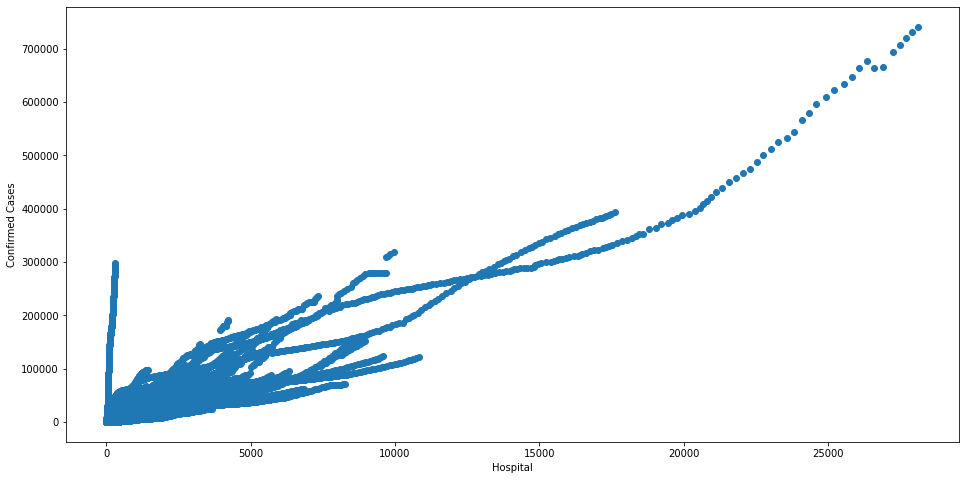

In [35]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['test_count'],df['confirmed_cases'])
ax.set_xlabel('Hospital')
ax.set_ylabel('Confirmed Cases')
plt.show()

**Similar scatter plots were observed from other features. outliers are steering the association between the variables and confirmed cases**

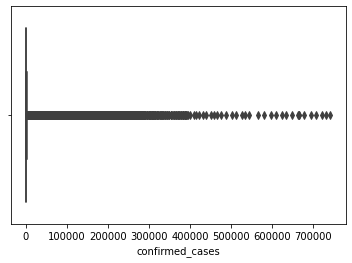

In [36]:
sns.boxplot(x=df['confirmed_cases'])

**BOX plot also shows evidence of outliers affecting the real usable data**

## Removing Outliers

In [37]:
df1 = df.iloc[:,3:]


### IQR Method

In [38]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [39]:
df1.describe()

,confirmed_cases,test_count,new_test_count,C_TOT_POP,C_M_Labour_Force_corr,C_M_Employed_corr,S_D_dly_new_test,critical_staffing_shortage_today_yes_SD,critical_staffing_shortage_anticipated_within_week_yes_SD,hospital_onset_covid_coverage_SD,inpatient_beds_SD,inpatient_beds_coverage_SD,previous_day_admission_adult_covid_confirmed_SD,staffed_adult_icu_bed_occupancy_SD,staffed_adult_icu_bed_occupancy_coverage_SD,staffed_icu_adult_patients_confirmed_and_suspected_covid_SD,staffed_icu_adult_patients_confirmed_covid_SD,total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD,total_adult_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,ToT_mobility
count,597075.00,597075.00,597075.00,597075.00,597075.00,597075.00,597075.00,5.97e+05,5.97e+05,5.97e+05,5.97e+05,5.97e+05,5.97e+05,5.97e+05,5.97e+05,5.97e+05,5.97e+05,5.97e+05,5.97e+05,597075.00,597075.00,597075.00
mean,227.93,11.66,0.13,20824.20,9376.65,8635.69,0.23,1.06e-04,1.27e-04,1.14e-03,1.40e-01,1.24e-03,6.73e-04,5.60e-03,6.14e-04,1.52e-03,1.35e-03,5.77e-03,4.75e-03,0.09,0.14,-3.07
std,354.31,15.33,0.15,20358.09,9674.60,8795.30,0.26,1.64e-04,1.93e-04,1.04e-03,1.37e-01,1.13e-03,1.03e-03,8.34e-03,8.50e-04,2.26e-03,2.00e-03,8.39e-03,7.12e-03,0.09,0.13,3.04
min,0.00,0.00,0.00,71.00,171.00,161.00,0.00,0.00e+00,0.00e+00,0.00e+00,4.31e-07,8.90e-08,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00,-12.17
25%,7.00,1.22,0.03,7505.00,3171.00,2946.00,0.06,0.00e+00,0.00e+00,4.04e-04,4.31e-02,4.42e-04,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.02,0.04,-3.83
50%,65.00,5.65,0.08,14827.00,6316.00,5845.00,0.15,1.59e-05,2.73e-05,8.72e-04,1.01e-01,9.50e-04,1.30e-04,9.86e-04,1.63e-04,2.34e-04,2.58e-04,1.29e-03,1.00e-03,0.06,0.10,-3.83
75%,295.00,16.00,0.18,26347.00,11721.00,10843.00,0.30,1.55e-04,1.89e-04,1.56e-03,1.89e-01,1.70e-03,9.95e-04,8.73e-03,1.02e-03,2.38e-03,2.08e-03,9.11e-03,7.18e-03,0.12,0.19,-1.95
max,2064.00,101.45,1.12,152218.00,71299.00,66117.00,1.71,8.20e-04,9.92e-04,7.87e-03,1.01e+00,8.48e-03,5.72e-03,4.90e-02,5.21e-03,1.29e-02,1.14e-02,4.97e-02,4.06e-02,0.66,0.99,6.24


## Feature Selection by BE Method

In [40]:
X = df1.iloc[:,1:]
Y = df1.iloc[:,0]

In [41]:

import statsmodels.api as sm
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(Y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(len(selected_features_BE))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


19


In [42]:
X = df1[selected_features_BE]
df1.corr()

,confirmed_cases,test_count,new_test_count,C_TOT_POP,C_M_Labour_Force_corr,C_M_Employed_corr,S_D_dly_new_test,critical_staffing_shortage_today_yes_SD,critical_staffing_shortage_anticipated_within_week_yes_SD,hospital_onset_covid_coverage_SD,inpatient_beds_SD,inpatient_beds_coverage_SD,previous_day_admission_adult_covid_confirmed_SD,staffed_adult_icu_bed_occupancy_SD,staffed_adult_icu_bed_occupancy_coverage_SD,staffed_icu_adult_patients_confirmed_and_suspected_covid_SD,staffed_icu_adult_patients_confirmed_covid_SD,total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD,total_adult_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,ToT_mobility
confirmed_cases,1.00,0.72,0.55,0.21,0.21,0.22,0.18,0.59,0.61,0.37,0.36,0.35,0.71,0.64,0.62,0.68,0.72,0.73,0.75,0.42,0.37,0.13
test_count,0.72,1.00,0.88,0.39,0.38,0.39,0.31,0.57,0.57,0.46,0.53,0.44,0.71,0.81,0.72,0.71,0.72,0.77,0.75,0.60,0.55,0.20
new_test_count,0.55,0.88,1.00,0.60,0.58,0.58,0.41,0.39,0.39,0.57,0.70,0.58,0.54,0.65,0.55,0.56,0.55,0.62,0.57,0.75,0.71,0.22
C_TOT_POP,0.21,0.39,0.60,1.00,0.96,0.96,0.47,0.06,0.06,0.65,0.81,0.68,0.10,0.25,0.17,0.15,0.14,0.19,0.14,0.78,0.80,0.14
C_M_Labour_Force_corr,0.21,0.38,0.58,0.96,1.00,1.00,0.47,0.06,0.06,0.64,0.78,0.66,0.09,0.24,0.17,0.14,0.13,0.18,0.13,0.75,0.77,0.13
C_M_Employed_corr,0.22,0.39,0.58,0.96,1.00,1.00,0.47,0.07,0.07,0.63,0.77,0.65,0.11,0.26,0.19,0.15,0.15,0.19,0.14,0.74,0.76,0.13
S_D_dly_new_test,0.18,0.31,0.41,0.47,0.47,0.47,1.00,0.23,0.24,0.57,0.47,0.58,0.13,0.19,0.29,0.13,0.14,0.17,0.15,0.45,0.47,0.10
critical_staffing_shortage_today_yes_SD,0.59,0.57,0.39,0.06,0.06,0.07,0.23,1.00,0.99,0.37,0.23,0.32,0.67,0.68,0.78,0.73,0.76,0.71,0.72,0.29,0.25,0.12
critical_staffing_shortage_anticipated_within_week_yes_SD,0.61,0.57,0.39,0.06,0.06,0.07,0.24,0.99,1.00,0.38,0.23,0.33,0.69,0.70,0.79,0.74,0.78,0.72,0.74,0.30,0.25,0.12
hospital_onset_covid_coverage_SD,0.37,0.46,0.57,0.65,0.64,0.63,0.57,0.37,0.38,1.00,0.82,0.96,0.32,0.40,0.49,0.33,0.34,0.35,0.34,0.77,0.82,0.17


In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597075 entries, 122657 to 1085024
Data columns (total 19 columns):
 #   Column                                                              Non-Null Count   Dtype  
---  ------                                                              --------------   -----  
 0   test_count                                                          597075 non-null  float64
 1   new_test_count                                                      597075 non-null  float64
 2   C_TOT_POP                                                           597075 non-null  float64
 3   C_M_Employed_corr                                                   597075 non-null  float64
 4   S_D_dly_new_test                                                    597075 non-null  float64
 5   critical_staffing_shortage_today_yes_SD                             597075 non-null  float64
 6   critical_staffing_shortage_anticipated_within_week_yes_SD           597075 non-null  float64
 

**Final feature selection by eliminating similar features with high correlation**

In [44]:
X.drop(X.columns[[2,3,4,5,7,17,18]],axis=1,inplace=True) #better

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [45]:
df1.corr()

,confirmed_cases,test_count,new_test_count,C_TOT_POP,C_M_Labour_Force_corr,C_M_Employed_corr,S_D_dly_new_test,critical_staffing_shortage_today_yes_SD,critical_staffing_shortage_anticipated_within_week_yes_SD,hospital_onset_covid_coverage_SD,inpatient_beds_SD,inpatient_beds_coverage_SD,previous_day_admission_adult_covid_confirmed_SD,staffed_adult_icu_bed_occupancy_SD,staffed_adult_icu_bed_occupancy_coverage_SD,staffed_icu_adult_patients_confirmed_and_suspected_covid_SD,staffed_icu_adult_patients_confirmed_covid_SD,total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD,total_adult_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,ToT_mobility
confirmed_cases,1.00,0.72,0.55,0.21,0.21,0.22,0.18,0.59,0.61,0.37,0.36,0.35,0.71,0.64,0.62,0.68,0.72,0.73,0.75,0.42,0.37,0.13
test_count,0.72,1.00,0.88,0.39,0.38,0.39,0.31,0.57,0.57,0.46,0.53,0.44,0.71,0.81,0.72,0.71,0.72,0.77,0.75,0.60,0.55,0.20
new_test_count,0.55,0.88,1.00,0.60,0.58,0.58,0.41,0.39,0.39,0.57,0.70,0.58,0.54,0.65,0.55,0.56,0.55,0.62,0.57,0.75,0.71,0.22
C_TOT_POP,0.21,0.39,0.60,1.00,0.96,0.96,0.47,0.06,0.06,0.65,0.81,0.68,0.10,0.25,0.17,0.15,0.14,0.19,0.14,0.78,0.80,0.14
C_M_Labour_Force_corr,0.21,0.38,0.58,0.96,1.00,1.00,0.47,0.06,0.06,0.64,0.78,0.66,0.09,0.24,0.17,0.14,0.13,0.18,0.13,0.75,0.77,0.13
C_M_Employed_corr,0.22,0.39,0.58,0.96,1.00,1.00,0.47,0.07,0.07,0.63,0.77,0.65,0.11,0.26,0.19,0.15,0.15,0.19,0.14,0.74,0.76,0.13
S_D_dly_new_test,0.18,0.31,0.41,0.47,0.47,0.47,1.00,0.23,0.24,0.57,0.47,0.58,0.13,0.19,0.29,0.13,0.14,0.17,0.15,0.45,0.47,0.10
critical_staffing_shortage_today_yes_SD,0.59,0.57,0.39,0.06,0.06,0.07,0.23,1.00,0.99,0.37,0.23,0.32,0.67,0.68,0.78,0.73,0.76,0.71,0.72,0.29,0.25,0.12
critical_staffing_shortage_anticipated_within_week_yes_SD,0.61,0.57,0.39,0.06,0.06,0.07,0.24,0.99,1.00,0.38,0.23,0.33,0.69,0.70,0.79,0.74,0.78,0.72,0.74,0.30,0.25,0.12
hospital_onset_covid_coverage_SD,0.37,0.46,0.57,0.65,0.64,0.63,0.57,0.37,0.38,1.00,0.82,0.96,0.32,0.40,0.49,0.33,0.34,0.35,0.34,0.77,0.82,0.17


## Regression Model Training and Testing

In [46]:
X_train, X_test, y_train, y_test =  train_test_split(X,Y,test_size = 0.2, random_state= 0)

In [47]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [48]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)#predicting the test set results
y_pred = regressor.predict(X_test)
y_pred1 = regressor.predict(X_train)

In [49]:
y_pred = [0 if i < 0 else i for i in y_pred]

### Checking for accuracy of the model using statistical metrics

In [50]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('The mean square error of cases and predict value is: ', mse)

The mean square error of cases and predict value is:  41812.0709277742


In [51]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('The mean absolute error of cases and predicted value is: ', mae)

The mean absolute error of cases and predicted value is:  112.76446140586276


In [52]:
mse1 = mean_squared_error(y_train, y_pred1)
print('The mean square error of cases and predicted value is: ', mse1)

The mean square error of cases and predicted value is:  42338.693201912734


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


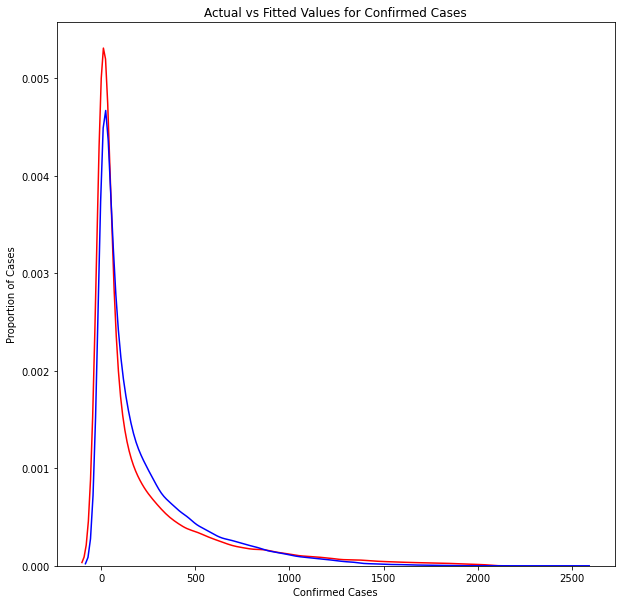

In [53]:
plt.figure(figsize=(10, 10))


ax1 = sns.distplot(y_test, hist=False,  color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Confirmed Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Proportion of Cases')
plt.show()
plt.close()

In [54]:
print('The R-square is: ', regressor.score(X_train, y_train))

The R-square is:  0.6632809802755842


In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597075 entries, 122657 to 1085024
Data columns (total 12 columns):
 #   Column                                                              Non-Null Count   Dtype  
---  ------                                                              --------------   -----  
 0   test_count                                                          597075 non-null  float64
 1   new_test_count                                                      597075 non-null  float64
 2   critical_staffing_shortage_anticipated_within_week_yes_SD           597075 non-null  float64
 3   inpatient_beds_coverage_SD                                          597075 non-null  float64
 4   previous_day_admission_adult_covid_confirmed_SD                     597075 non-null  float64
 5   staffed_adult_icu_bed_occupancy_SD                                  597075 non-null  float64
 6   staffed_adult_icu_bed_occupancy_coverage_SD                         597075 non-null  float64
 

In [56]:
regressor.coef_

array([ 272.80659008, -140.44588558,   27.95104293,    4.94577156,
         34.0930026 ,  -98.33857924,   10.56664017,   -1.31302342,
         57.79377993,  -88.37001457,  166.57339763,   64.34553954])

# Validation Data Cleaning and Prediction

**Importing Validation Dataset from google drive**

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
validation_df = pd.read_csv('/content/drive/MyDrive/DATA/EQ-2021-Validation-Data-Sample_1.csv', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (37,45,46) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Changing datatype into 'float64'**


In [59]:
validation_df.iloc[:,31:35] = validation_df.iloc[:,31:35].astype('float64')
validation_df.iloc[:,4] = validation_df.iloc[:,4].astype('float64')
validation_df.iloc[:,45:47] = validation_df.iloc[:,45:47].apply(lambda col: pd.to_numeric(col, errors='coerce'))
validation_df.iloc[:,37] = validation_df.iloc[:,37].apply(lambda col: pd.to_numeric(col, errors='coerce'))
validation_df.iloc[:,45:47] = validation_df.iloc[:,45:47].astype('float64')
validation_df.iloc[:,37] = validation_df.iloc[:,37].astype('float64')
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47130 entries, 0 to 47129
Data columns (total 80 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   countyFIPS                                                              47130 non-null  int64  
 1   stateFIPS                                                               47130 non-null  int64  
 2   date                                                                    47130 non-null  object 
 3   google_mobility_retail_and_recreation                                   24498 non-null  float64
 4   google_mobility_grocery_and_pharmacy                                    21775 non-null  float64
 5   google_mobility_parks                                                   11009 non-null  float64
 6   google_mobility_transit_stations                                        14863 

In [60]:
validation_df.corr()

,countyFIPS,stateFIPS,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_parks,google_mobility_transit_stations,google_mobility_workplaces,google_mobility_residential,apple_mobility_driving,apple_mobility_transit,apple_mobility_walking,Electricity_Sales_Revenue_Residential($ x1000),Electricity_Sales_Sales_Residential(MWHr),Electricity_Sales_Customers_Count_Residential,Electricity_Sales_Revenue_Commercial($ x1000),Electricity_Sales_Sales_Commercial(MWHr),Electricity_Sales_Customers_Count_Commercial,Electricity_Sales_Revenue_Industrial($ x1000),Electricity_Sales_Sales_Industrial(MWHr),Electricity_Sales_Customers_Count_Industrial,Electricity_Sales_Revenue_Transportation ($ x1000),Electricity_Sales_Sales_Transportation(MWHr),Electricity_Sales_Customers_Count_Transportation,YoY_Reopened_Seated_Diner_Data,DOMESTIC_Air_Passengers,INTERNATIONAL_Air_Passengers,DOMESTIC_Flights_Cnt,INTERNATIONAL_Flights_Cnt,test_count,test_rate,new_test_rate,new_test_count,C_PCTPOVALL_2019,C_PCTPOV017_2019,C_PCTPOV517_2019,C_MEDHHINC_2019,C_TOT_POP,C_TOT_MALE,C_TOT_FEMALE,C_WA_MALE,C_WA_FEMALE,C_MinorityPCT,C_BlackPCT,C_HispanicPCT,C_M_Labour_Force_corr,C_M_Employed_corr,C_M_Unemployment_Rate_corr,S_D_dly_new_test,S_D_cummulative_test,initclaims_count_regular_cw,initclaims_rate_regular_cw,merchants_all_cd,revenue_all_cd,spend_all_cd,critical_staffing_shortage_today_yes_SD,critical_staffing_shortage_anticipated_within_week_yes_SD,hospital_onset_covid_SD,hospital_onset_covid_coverage_SD,inpatient_beds_SD,inpatient_beds_coverage_SD,previous_day_admission_adult_covid_confirmed_SD,previous_day_admission_adult_covid_suspected_SD,previous_day_admission_pediatric_covid_confirmed_SD,previous_day_admission_pediatric_covid_suspected_SD,staffed_adult_icu_bed_occupancy_SD,staffed_adult_icu_bed_occupancy_coverage_SD,staffed_icu_adult_patients_confirmed_and_suspected_covid_SD,staffed_icu_adult_patients_confirmed_covid_SD,total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD,total_adult_patients_hospitalized_confirmed_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD
countyFIPS,1.00e+00,1.00e+00,-8.67e-02,-0.06,7.98e-03,-5.11e-03,-0.06,8.82e-02,-0.06,1.31e-01,-0.03,0.13,1.92e-01,0.11,0.08,0.24,0.12,1.38e-01,2.62e-01,0.26,0.04,0.04,-6.83e-03,8.31e-19,NaN,NaN,NaN,NaN,-0.02,-1.64e-02,0.07,8.78e-03,-0.08,-0.07,-0.08,4.98e-02,-0.06,-0.06,-0.05,-0.05,-0.05,-0.05,-1.28e-01,0.09,-0.05,-0.05,0.09,-2.44e-03,4.06e-03,0.13,4.21e-01,9.13e-02,0.05,-1.65e-02,0.18,0.21,2.16e-01,0.19,1.48e-01,0.20,1.10e-01,0.21,0.03,2.40e-01,0.12,0.20,0.13,0.13,0.12,0.12,0.19,2.03e-01,-0.05,0.13,1.47e-01,-1.70e-03,-2.22e-02,2.62e-03,-7.69e-02
stateFIPS,1.00e+00,1.00e+00,-8.68e-02,-0.06,8.85e-03,-5.38e-03,-0.06,8.82e-02,-0.06,1.31e-01,-0.03,0.13,1.89e-01,0.11,0.08,0.23,0.12,1.35e-01,2.59e-01,0.26,0.04,0.04,-6.92e-03,3.24e-18,NaN,NaN,NaN,NaN,-0.02,-1.48e-02,0.07,7.84e-03,-0.08,-0.08,-0.08,5.03e-02,-0.05,-0.06,-0.05,-0.05,-0.05,-0.05,-1.29e-01,0.09,-0.05,-0.05,0.09,-3.62e-03,2.83e-03,0.13,4.22e-01,9.16e-02,0.05,-1.66e-02,0.18,0.21,2.14e-01,0.19,1.46e-01,0.20,1.08e-01,0.21,0.02,2.37e-01,0.12,0.20,0.12,0.13,0.12,0.12,0.18,2.00e-01,-0.05,0.13,1.44e-01,-3.73e-03,-2.41e-02,5.50e-04,-7.89e-02
google_mobility_retail_and_recreation,-8.67e-02,-8.68e-02,1.00e+00,0.73,4.75e-01,5.37e-01,0.67,-7.55e-01,0.58,3.45e-01,0.53,-0.03,8.93e-03,-0.04,-0.06,-0.04,-0.04,-3.35e-02,-9.92e-03,-0.04,-0.12,-0.13,-1.57e-01,7.53e-03,NaN,NaN,NaN,NaN,-0.10,-1.42e-01,-0.12,-9.06e-02,0.19,0.24,0.23,-3.44e-01,-0.19,-0.24,-0.24,-0.23,-0.24,-0.10,7.57e-03,-0.10,-0.20,-0.20,-0.09,-5.30e-02,-1.29e-01,-0.26,-5.33e-03,7.31e-02,0.13,9.75e-02,-0.02,-0.02,-9.94e-02,-0.0

### Removing variables of lesser relevance

In [61]:
validation_df.drop(validation_df.columns[[8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,33,34,35,36,38,39,40,41,42,43,44,50,51,52,53,54]],axis=1, inplace=True)
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47130 entries, 0 to 47129
Data columns (total 43 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   countyFIPS                                                              47130 non-null  int64  
 1   stateFIPS                                                               47130 non-null  int64  
 2   date                                                                    47130 non-null  object 
 3   google_mobility_retail_and_recreation                                   24498 non-null  float64
 4   google_mobility_grocery_and_pharmacy                                    21775 non-null  float64
 5   google_mobility_parks                                                   11009 non-null  float64
 6   google_mobility_transit_stations                                        14863 

**Replacing misssing values**

In [62]:
validation_df = validation_df.fillna(validation_df.mean())

In [63]:
validation_df.head()

,countyFIPS,stateFIPS,date,google_mobility_retail_and_recreation,google_mobility_grocery_and_pharmacy,google_mobility_parks,google_mobility_transit_stations,google_mobility_workplaces,test_count,test_rate,new_test_rate,new_test_count,C_TOT_POP,C_M_Labour_Force_corr,C_M_Employed_corr,C_M_Unemployment_Rate_corr,S_D_dly_new_test,S_D_cummulative_test,critical_staffing_shortage_today_yes_SD,critical_staffing_shortage_anticipated_within_week_yes_SD,hospital_onset_covid_SD,hospital_onset_covid_coverage_SD,inpatient_beds_SD,inpatient_beds_coverage_SD,previous_day_admission_adult_covid_confirmed_SD,previous_day_admission_adult_covid_suspected_SD,previous_day_admission_pediatric_covid_confirmed_SD,previous_day_admission_pediatric_covid_suspected_SD,staffed_adult_icu_bed_occupancy_SD,staffed_adult_icu_bed_occupancy_coverage_SD,staffed_icu_adult_patients_confirmed_and_suspected_covid_SD,staffed_icu_adult_patients_confirmed_covid_SD,total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD,total_adult_patients_hospitalized_confirmed_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD
0,1001,1,01-02-2021,-20.0,-5.0,-22.49,-22.47,-19.0,2144425,43735,156.0,7631.0,55514.0,25029.0,24237.0,3.2,9296.0,3.63e+06,32,35,13,106,15115,110,230,84,5,9,1446,110,612,596,2027,1887,26,16,0.75,11262,15115,0.19,0.14,0.38,0.87
1,1001,1,02-02-2021,-14.0,4.0,-22.49,-22.47,-21.0,2133836,43519,104.0,5124.0,55514.0,25029.0,24237.0,3.2,15595.0,3.65e+06,31,35,16,105,15072,109,255,130,5,4,1481,109,607,589,1948,1862,26,18,0.77,11536,15072,0.18,0.14,0.38,0.90
2,1001,1,03-02-2021,-1.0,7.0,-22.49,-22.47,-19.0,2139919,43643,98.7,4841.0,55514.0,25029.0,24237.0,3.2,15391.0,3.66e+06,34,35,16,115,15582,117,219,114,6,9,1478,117,603,575,1992,1831,32,24,0.79,12245,15582,0.17,0.13,0.37,0.90
3,1001,1,04-02-2021,-14.0,1.0,-22.49,-22.47,-19.0,2149684,43843,96.3,4720.0,55514.0,25029.0,24237.0,3.2,17016.0,3.68e+06,33,35,23,113,15578,117,206,124,1,7,1455,117,580,553,1904,1747,29,20,0.77,12062,15578,0.16,0.13,0.36,0.88
4,1001,1,05-02-2021,-15.0,-5.0,-22.49,-22.47,-20.0,2149684,43843,65.2,3197.0,55514.0,25029.0,24237.0,3.2,14762.0,3.69e+06,33,34,15,113,15510,117,236,100,6,14,1435,117,536,519,1879,1740,29,21,0.78,12023,15510,0.16,0.13,0.34,0.88


## Combined Mobility

In [64]:
validation_df['ToT_mobility'] =validation_df.iloc[:,3:8].mean(axis=1)
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47130 entries, 0 to 47129
Data columns (total 44 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   countyFIPS                                                              47130 non-null  int64  
 1   stateFIPS                                                               47130 non-null  int64  
 2   date                                                                    47130 non-null  object 
 3   google_mobility_retail_and_recreation                                   47130 non-null  float64
 4   google_mobility_grocery_and_pharmacy                                    47130 non-null  float64
 5   google_mobility_parks                                                   47130 non-null  float64
 6   google_mobility_transit_stations                                        47130 

## Converting State data to County data according to Population Distribution

In [65]:
validation_df['S_TOT_POP'] = validation_df['C_TOT_POP'].groupby(validation_df['stateFIPS']).transform('sum')

In [66]:
validation_df['ratio'] = validation_df['C_TOT_POP']/validation_df['S_TOT_POP']

In [67]:
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47130 entries, 0 to 47129
Data columns (total 46 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   countyFIPS                                                              47130 non-null  int64  
 1   stateFIPS                                                               47130 non-null  int64  
 2   date                                                                    47130 non-null  object 
 3   google_mobility_retail_and_recreation                                   47130 non-null  float64
 4   google_mobility_grocery_and_pharmacy                                    47130 non-null  float64
 5   google_mobility_parks                                                   47130 non-null  float64
 6   google_mobility_transit_stations                                        47130 

In [68]:
validation_df.iloc[:,16:43] = validation_df.iloc[:,16:43].mul(validation_df['ratio'],axis=0)

In [69]:
validation_df.iloc[:,8:12] = validation_df.iloc[:,8:12].mul(validation_df['ratio'],axis=0)
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47130 entries, 0 to 47129
Data columns (total 46 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   countyFIPS                                                              47130 non-null  int64  
 1   stateFIPS                                                               47130 non-null  int64  
 2   date                                                                    47130 non-null  object 
 3   google_mobility_retail_and_recreation                                   47130 non-null  float64
 4   google_mobility_grocery_and_pharmacy                                    47130 non-null  float64
 5   google_mobility_parks                                                   47130 non-null  float64
 6   google_mobility_transit_stations                                        47130 

## Removing Features Eliminated by BE Method

In [70]:
validation_df.drop(validation_df.columns[[3,4,5,6,7,9,10]],axis=1, inplace=True)


## Prediction by Regression Model

In [71]:
X_valid = validation_df[X.columns]

In [72]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_valid = sc_X.fit_transform(X_valid)


In [73]:
validation_df['Confirmed_cases'] = regressor.predict(X_valid)

In [74]:
validation_df['Confirmed_cases'][validation_df['Confirmed_cases'] < 0] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
validation_df.head(15)

,countyFIPS,stateFIPS,date,test_count,new_test_count,C_TOT_POP,C_M_Labour_Force_corr,C_M_Employed_corr,C_M_Unemployment_Rate_corr,S_D_dly_new_test,S_D_cummulative_test,critical_staffing_shortage_today_yes_SD,critical_staffing_shortage_anticipated_within_week_yes_SD,hospital_onset_covid_SD,hospital_onset_covid_coverage_SD,inpatient_beds_SD,inpatient_beds_coverage_SD,previous_day_admission_adult_covid_confirmed_SD,previous_day_admission_adult_covid_suspected_SD,previous_day_admission_pediatric_covid_confirmed_SD,previous_day_admission_pediatric_covid_suspected_SD,staffed_adult_icu_bed_occupancy_SD,staffed_adult_icu_bed_occupancy_coverage_SD,staffed_icu_adult_patients_confirmed_and_suspected_covid_SD,staffed_icu_adult_patients_confirmed_covid_SD,total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD,total_adult_patients_hospitalized_confirmed_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD,ToT_mobility,S_TOT_POP,ratio,Confirmed_cases
0,1001,1,01-02-2021,1645.86,5.86,55514.0,25029.0,24237.0,3.20,7.13,2787.08,0.02,0.03,9.98e-03,0.08,11.60,0.08,0.18,0.06,3.84e-03,6.91e-03,1.11,0.08,0.47,0.46,1.56,1.45,2.00e-02,1.23e-02,5.72e-04,8.64,11.60,1.44e-04,1.07e-04,2.89e-04,6.68e-04,-17.79,7.23e+07,7.68e-04,200.72
1,1001,1,02-02-2021,1637.73,3.93,55514.0,25029.0,24237.0,3.20,11.97,2799.05,0.02,0.03,1.23e-02,0.08,11.57,0.08,0.20,0.10,3.84e-03,3.07e-03,1.14,0.08,0.47,0.45,1.50,1.43,2.00e-02,1.38e-02,5.87e-04,8.85,11.57,1.35e-04,1.04e-04,2.88e-04,6.87e-04,-15.19,7.23e+07,7.68e-04,203.43
2,1001,1,03-02-2021,1642.40,3.72,55514.0,25029.0,24237.0,3.20,11.81,2810.86,0.03,0.03,1.23e-02,0.09,11.96,0.09,0.17,0.09,4.61e-03,6.91e-03,1.13,0.09,0.46,0.44,1.53,1.41,2.46e-02,1.84e-02,6.03e-04,9.40,11.96,1.28e-04,1.01e-04,2.88e-04,6.89e-04,-11.59,7.23e+07,7.68e-04,202.08
3,1001,1,04-02-2021,1649.90,3.62,55514.0,25029.0,24237.0,3.20,13.06,2823.92,0.03,0.03,1.77e-02,0.09,11.96,0.09,0.16,0.10,7.68e-04,5.37e-03,1.12,0.09,0.45,0.42,1.46,1.34,2.23e-02,1.54e-02,5.94e-04,9.26,11.96,1.26e-04,9.81e-05,2.76e-04,6.77e-04,-15.39,7.23e+07,7.68e-04,200.45
4,1001,1,05-02-2021,1649.90,2.45,55514.0,25029.0,24237.0,3.20,11.33,2835.25,0.03,0.03,1.15e-02,0.09,11.90,0.09,0.18,0.08,4.61e-03,1.07e-02,1.10,0.09,0.41,0.40,1.44,1.34,2.23e-02,1.61e-02,5.95e-04,9.23,11.90,1.25e-04,9.72e-05,2.58e-04,6.75e-04,-16.99,7.23e+07,7.68e-04,202.11
5,1001,1,06-02-2021,1674.72,6.00,55514.0,25029.0,24237.0,3.20,8.09,2843.34,0.02,0.03,1.07e-02,0.09,11.85,0.09,0.16,0.08,5.37e-03,6.14e-03,1.08,0.09,0.40,0.39,1.39,1.26,2.07e-02,1.69e-02,5.70e-04,8.80,11.85,1.27e-04,9.39e-05,2.52e-04,6.56e-04,-15.99,7.23e+07,7.68e-04,195.62
6,1001,1,07-02-2021,1678.79,5.11,55514.0,25029.0,24237.0,3.20,3.56,2846.90,0.02,0.03,9.98e-03,0.09,11.84,0.09,0.13,0.08,1.54e-03,6.14e-03,1.07,0.09,0.40,0.38,1.38,1.23,2.15e-02,1.38e-02,5.59e-04,8.62,11.84,1.29e-04,9.38e-05,2.48e-04,6.51e-04,-15.09,7.23e+07,7.68e-04,194.73
7,1001,1,08-02-2021,1682.26,5.20,55514.0,25029.0,24237.0,3.20,7.25,2854.15,0.02,0.03,9.98e-03,0.08,11.52,0.08,0.15,0.07,0.00e+00,7.68e-03,1.06,0.08,0.40,0.38,1.24,1.18,1.54e-02,6.91e-03,5.60e-04,8.41,11.52,1.18e-04,8.61e-05,2.47e-04,6.42e-04,-15.59,7.23e+07,7.68e-04,195.49
8,1001,1,09-02-2021,1686.83,7.01,55514.0,25029.0,24237.0,3.20,12.39,2866.53,0.02,0.03,1.23e-02,0.08,11.55,0.08,0.15,0.10,3.84e-03,6.14e-03,1.09,0.08,0.37,0.36,1.21,1.11,1.61e-02,6.91e-03,5.86e-04,8.82,11.55,1.12e-04,8.54e-05,2.32e-04,6.61e-04,-14.79,7.23e+07,7.68e-04,190.81
9,1001,1,10-02-2021,1691.79,7.06,55514.0,25029.0,24237.0,3.20,12.38,2878.91,0.02,0.03,1.38e-02,0.09,11.91,0.09,0.14,0.11,3.07e-03,1.07e-02,1.11,0.09,0.36,0.35,1.24,1.14,2.00e-02,1.15e-02,5.99e-04,9.30,11.91,1.05e-04,8.23e-05,2.24e-04,6.

In [76]:
df1.describe()

,confirmed_cases,test_count,new_test_count,C_TOT_POP,C_M_Labour_Force_corr,C_M_Employed_corr,S_D_dly_new_test,critical_staffing_shortage_today_yes_SD,critical_staffing_shortage_anticipated_within_week_yes_SD,hospital_onset_covid_coverage_SD,inpatient_beds_SD,inpatient_beds_coverage_SD,previous_day_admission_adult_covid_confirmed_SD,staffed_adult_icu_bed_occupancy_SD,staffed_adult_icu_bed_occupancy_coverage_SD,staffed_icu_adult_patients_confirmed_and_suspected_covid_SD,staffed_icu_adult_patients_confirmed_covid_SD,total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD,total_adult_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,ToT_mobility
count,597075.00,597075.00,597075.00,597075.00,597075.00,597075.00,597075.00,5.97e+05,5.97e+05,5.97e+05,5.97e+05,5.97e+05,5.97e+05,5.97e+05,5.97e+05,5.97e+05,5.97e+05,5.97e+05,5.97e+05,597075.00,597075.00,597075.00
mean,227.93,11.66,0.13,20824.20,9376.65,8635.69,0.23,1.06e-04,1.27e-04,1.14e-03,1.40e-01,1.24e-03,6.73e-04,5.60e-03,6.14e-04,1.52e-03,1.35e-03,5.77e-03,4.75e-03,0.09,0.14,-3.07
std,354.31,15.33,0.15,20358.09,9674.60,8795.30,0.26,1.64e-04,1.93e-04,1.04e-03,1.37e-01,1.13e-03,1.03e-03,8.34e-03,8.50e-04,2.26e-03,2.00e-03,8.39e-03,7.12e-03,0.09,0.13,3.04
min,0.00,0.00,0.00,71.00,171.00,161.00,0.00,0.00e+00,0.00e+00,0.00e+00,4.31e-07,8.90e-08,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00,0.00,-12.17
25%,7.00,1.22,0.03,7505.00,3171.00,2946.00,0.06,0.00e+00,0.00e+00,4.04e-04,4.31e-02,4.42e-04,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.00e+00,0.02,0.04,-3.83
50%,65.00,5.65,0.08,14827.00,6316.00,5845.00,0.15,1.59e-05,2.73e-05,8.72e-04,1.01e-01,9.50e-04,1.30e-04,9.86e-04,1.63e-04,2.34e-04,2.58e-04,1.29e-03,1.00e-03,0.06,0.10,-3.83
75%,295.00,16.00,0.18,26347.00,11721.00,10843.00,0.30,1.55e-04,1.89e-04,1.56e-03,1.89e-01,1.70e-03,9.95e-04,8.73e-03,1.02e-03,2.38e-03,2.08e-03,9.11e-03,7.18e-03,0.12,0.19,-1.95
max,2064.00,101.45,1.12,152218.00,71299.00,66117.00,1.71,8.20e-04,9.92e-04,7.87e-03,1.01e+00,8.48e-03,5.72e-03,4.90e-02,5.21e-03,1.29e-02,1.14e-02,4.97e-02,4.06e-02,0.66,0.99,6.24


In [77]:
validation_df.describe()

,countyFIPS,stateFIPS,test_count,new_test_count,C_TOT_POP,C_M_Labour_Force_corr,C_M_Employed_corr,C_M_Unemployment_Rate_corr,S_D_dly_new_test,S_D_cummulative_test,critical_staffing_shortage_today_yes_SD,critical_staffing_shortage_anticipated_within_week_yes_SD,hospital_onset_covid_SD,hospital_onset_covid_coverage_SD,inpatient_beds_SD,inpatient_beds_coverage_SD,previous_day_admission_adult_covid_confirmed_SD,previous_day_admission_adult_covid_suspected_SD,previous_day_admission_pediatric_covid_confirmed_SD,previous_day_admission_pediatric_covid_suspected_SD,staffed_adult_icu_bed_occupancy_SD,staffed_adult_icu_bed_occupancy_coverage_SD,staffed_icu_adult_patients_confirmed_and_suspected_covid_SD,staffed_icu_adult_patients_confirmed_covid_SD,total_adult_patients_hospitalized_confirmed_and_suspected_covid_SD,total_adult_patients_hospitalized_confirmed_covid_SD,total_pediatric_patients_hospitalized_confirmed_and_suspected_covid_SD,total_pediatric_patients_hospitalized_confirmed_covid_SD,inpatient_beds_utilization_SD,inpatient_beds_utilization_numerator_SD,inpatient_beds_utilization_denominator_SD,percent_of_inpatients_with_covid_SD,inpatient_bed_covid_utilization_SD,adult_icu_bed_covid_utilization_SD,adult_icu_bed_utilization_SD,ToT_mobility,S_TOT_POP,ratio,Confirmed_cases
count,47130.00,47130.00,47130.00,4.71e+04,4.71e+04,4.71e+04,4.71e+04,47130.00,4.71e+04,47130.00,4.71e+04,4.71e+04,4.71e+04,4.71e+04,47130.00,4.71e+04,4.71e+04,4.71e+04,4.71e+04,4.71e+04,4.71e+04,4.71e+04,4.71e+04,4.71e+04,4.71e+04,4.71e+04,4.71e+04,4.71e+04,4.71e+04,4.71e+04,47130.00,4.71e+04,4.71e+04,4.71e+04,4.71e+04,47130.00,4.71e+04,4.71e+04,47130.00
mean,30383.65,30.28,6877.22,3.55e+01,9.93e+04,5.09e+04,4.76e+04,5.48,2.95e+01,6867.31,1.80e-02,2.18e-02,3.23e-02,1.23e-01,16.55,1.27e-01,1.81e-01,1.23e-01,3.78e-03,1.03e-02,1.39e+00,1.27e-01,4.22e-01,4.05e-01,1.74e+00,1.59e+00,2.91e-02,1.75e-02,7.51e-04,1.19e+01,16.54,1.30e-04,9.24e-05,2.01e-04,7.57e-04,-18.97,1.26e+08,1.08e-03,228.04
std,15160.26,15.14,24820.56,1.40e+02,3.16e+05,1.66e+05,1.52e+05,1.89,1.13e+02,22400.85,6.97e-02,8.18e-02,1.35e-01,3.21e-01,48.09,3.28e-01,6.38e-01,4.39e-01,1.44e-02,4.02e-02,4.33e+00,3.28e-01,1.69e+00,1.64e+00,6.67e+00,6.20e+00,1.09e-01,7.10e-02,2.15e-03,3.56e+01,48.07,3.88e-04,2.92e-04,6.20e-04,2.14e-03,7.87,1.18e+08,2.94e-03,297.76
min,1001.00,1.00,3.18,7.62e-03,7.10e+01,0.00e+00,0.00e+00,0.40,9.96e-03,1.36,0.00e+00,0.00e+00,0.00e+00,1.03e-04,0.01,1.03e-04,4.31e-06,0.00e+00,0.00e+00,0.00e+00,5.77e-04,1.03e-04,7.33e-05,6.90e-05,2.11e-04,1.81e-04,0.00e+00,0.00e+00,1.24e-07,7.33e-03,0.01,3.24e-08,2.25e-08,5.73e-08,1.45e-07,-84.80,8.65e+06,1.82e-07,141.49
25%,18177.00,18.00,586.78,2.29e+00,1.11e+04,4.78e+03,4.53e+03,4.30,2.00e+00,645.76,1.48e-03,2.03e-03,1.42e-03,1.89e-02,1.95,1.95e-02,1.50e-02,9.34e-03,1.19e-04,4.99e-04,1.49e-01,1.95e-02,3.42e-02,3.20e-02,1.41e-01,1.25e-01,2.06e-03,1.08e-03,9.84e-05,1.32e+00,1.95,1.64e-05,1.10e-05,2.39e-05,1.03e-04,-20.00,4.48e+07,1.43e-04,150.62
50%,29176.00,29.00,1494.81,6.42e+00,2.60e+04,1.14e+04,1.08e+04,5.48,5.33e+00,1593.63,4.65e-03,5.79e-03,4.71e-03,4.04e-02,4.50,4.16e-02,4.11e-02,2.77e-02,6.76e-04,1.97e-03,3.73e-01,4.16e-02,9.44e-02,8.88e-02,3.72e-01,3.34e-01,5.90e-03,3.41e-03,2.16e-04,3.12e+00,4.49,3.67e-05,2.52e-05,5.49e-05,2.23e-04,-18.68,8.83e+07,3.19e-04,162.90
75%,45081.00,45.00,4144.08,1.97e+01,6.83e+04,3.16e+04,2.96e+04,6.20,1.63e+01,4474.70,1.26e-02,1.58e-02,1.52e-02,1.01e-01,11.50,1.03e-01,1.16e-01,7.99e-02,2.29e-03,6.38e-03,9.50e-01,1.03e-01,2.59e-01,2.48e-01,1.04e+00,9.47e-01,1.81e-02,1.06e-02,5.59e-04,8.17e+00,11.47,1.00e-04,6.93e-05,1.51e-04,5.83e-04,-15.68,1.49e+08,8.10e-04,197.81
max,56045.00,56.00,802512.59,4.69e+03,9.96e+06,4.90e+06,4.37e+06,18.50,4.67e+03,694190.21,2.60e+00,2.90e+00,4.57e+00,7.16e+00,1179.57,7.30e+00,2.28e+01,1.24e+01,4.89e-01,2.60e+00,1.29e+02,7.28e+00,6.75e+01,6.68e+01,2.58e+02,2.48e+02,2.74e+00,2.34e+00,5.30e-02,9.37e+02,1179.57,1.28e-02,9.23e-03,1.50e-02,5.76e-02,25.20,5.71e+08,6.67e-02,10350.35


In [78]:
validation_df.to_csv('Result_final.csv')

In [79]:
from google.colab import files
files.download('Result_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>